## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from neural_networks import NeuralNetwork as NN


### Importing dataset

In [2]:
raw_df = pd.read_csv('./Dataset/Dengue.csv')
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### performing initial checks on dataset

In [3]:
pd.options.display.max_columns=None

In [4]:
raw_df.describe(include='all')

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,69.625588,9.034032,0.0,0.0,17.599554,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193,NaN
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,45.539264,14.201016,0.0,0.0,8.980189,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627,NaN
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,0.000000,0.000000,0.0,0.0,3.600000,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000,NaN
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,0.000000,0.000000,0.0,0.0,11.200000,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000,NaN
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,100.000000,4.170000,0.0,0.0,15.589178,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000,NaN
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,100.000000,9.705508,0.0,0.0,22.775000,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000,NaN


In [5]:
raw_df['cases'].describe()

count      602.000000
mean      8502.342193
std       6780.749627
min         52.000000
25%       3017.750000
50%       7490.000000
75%      12702.500000
max      24983.000000
Name: cases, dtype: float64

In [6]:
#Updating labels column: might be useful in future to test classification problem
raw_df['labels'] = pd.cut(
    raw_df['cases'],
    bins=[-float('inf'), 2500, 5000, 7500, float('inf')],
    labels=[0, 1, 2, 3]
).astype(int)


In [7]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,2
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,3
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,0


### Preparing the input data to neural network

In [8]:
df = raw_df.copy()

In [9]:
df.drop(columns=['serial', 'cases', 'labels', 'stations', 'snow', 'snowdepth'], inplace=True)

In [10]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904
1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537
2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569
3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813
4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480


In [11]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,2
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,3
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,0


In [12]:
X = np.array(df)
# Y_classification = np.array(pd.get_dummies(raw_df['labels'], dtype=int))
Y_cl = raw_df['labels']



In [13]:
print(X.shape)

print(Y_cl.shape)

(602, 20)
(602,)


#### Spliting dataset into train  dev and test sets

In [14]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y_cl, test_size=0.3, random_state=42)

In [15]:
X_dev_, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [16]:
print(X_train.shape)
print(X_dev_.shape)
print(X_test.shape)


(421, 20)
(90, 20)
(91, 20)


#### Normalizing inputs

In [17]:
X_mean = np.mean(X_train,  axis=0, keepdims=True)
X_dev = np.std(X_train, axis=0, keepdims=True)

In [18]:
X_train = (X_train-X_mean)/X_dev
X_train[:1,:]

array([[-0.3153459 ,  0.52442687, -0.14897567,  0.59901433,  0.11854252,
         0.00627622,  0.89043439,  1.42371925,  1.13709605,  0.67620327,
         0.21132408, -0.33143443, -0.86594917, -0.12238367,  0.8091319 ,
        -0.53908097, -0.55545085, -0.56680802, -0.98836085,  0.18618026]])

In [19]:
X_dev_ = (X_dev_-X_mean)/X_dev
X_dev_[:1,:]

array([[ 0.65997314, -0.18924305,  0.05610572,  0.0723754 , -0.35780477,
        -0.29046312, -0.37378142, -0.59574256, -0.4406535 ,  0.67620327,
         0.77402431, -0.8191061 ,  1.66706419, -0.04326152,  0.57630207,
        -0.83323967,  0.0950825 ,  0.08680913,  0.67140407,  1.8219068 ]])

In [20]:
X_test = (X_test-X_mean)/X_dev
X_test[:1,:]

array([[-0.09027227, -0.26061004, -0.39507334, -0.05401794, -0.40543949,
        -0.5660068 , -0.02261036,  0.3765909 , -0.22478435,  0.67620327,
        -0.07036379, -0.61960405,  0.42484335, -0.00674361, -0.4595531 ,
        -0.83323967,  0.90414919,  0.88801725,  0.67140407,  1.8219068 ]])

#### Transposing the matrices so that each matrix column contains a single training example

In [21]:
X_train = X_train.T
X_development = X_dev_.T
X_test = X_test.T

In [22]:
def one_hot_encode(y, num_classes):
    # Creates an identity matrix and selects the rows based on y values
    return np.eye(num_classes)[y]

In [23]:
pd.Series(Y_train).value_counts()

labels
3    215
0     99
2     60
1     47
Name: count, dtype: int64

In [24]:
Y_train.shape

(421,)

In [25]:
Y_train = one_hot_encode(Y_train,4 ).T
Y_train[:,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [26]:
Y_dev = one_hot_encode(Y_dev, 4).T
Y_dev[:, :5]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1.]])

In [27]:
Y_test = one_hot_encode(Y_test, 4).T
Y_test[:, :5]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.]])

In [28]:
X_train.shape

(20, 421)

In [29]:
Y_test.shape

(4, 91)

In [30]:
Y_train.shape

(4, 421)

### Training a model with Weighted classes strategy

To calculate the appropriate class weights based on the value counts of the classes in your `Y_train`, you can use the inverse of the frequency of each class. This way, the less frequent classes will have a higher weight, and the more frequent classes will have a lower weight. This will help the model give more importance to the underrepresented classes.

Here's how you can compute the class weights manually:

### Formula for Class Weights:

weight_i = Total Samples / Count of Class i
 
Where:
- \(N\) is the total number of samples in your dataset.
- \(\text{count}_i\) is the number of occurrences of class \(i\).

### Steps:
1. Compute the total number of samples \(N\).
2. For each class \(i\), compute the inverse frequency (the class weight).

These weights can then be used to adjust the loss calculation during training, making the model pay more attention to the less frequent classes. You can apply these weights to the loss function during backpropagation.

In [31]:
class_weights = np.array([[3.5],
                          [15],
                          [12],
                          [3.5]])

In [32]:
Classifier_model_1 = NN(input_size=X_train.shape[0], architecture=[5,5,5,4],activations=['Leaky_ReLU', 'Leaky_ReLU', 'Leaky_ReLU', 'Softmax'] ,loss="CCE", class_weights=class_weights)

In [33]:
def model_train(model, num_epochs=1000, learning_rate=0.1, eval_interval=1000,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_train, learning_rate=learning_rate)
        train_losses.append(train_loss)
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_dev)
            dev_losses.append(dev_loss)
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [34]:
train_loss, dev_loss = model_train(model=Classifier_model_1, learning_rate=0.01, num_epochs=50000)

Epoch 0: Train Loss = 1298.1397353770449, Dev Loss = 280.9094599440011
Epoch 1000: Train Loss = 898.0125441289579, Dev Loss = 200.2650601435837
Epoch 2000: Train Loss = 877.3019562817065, Dev Loss = 197.46517275690096
Epoch 3000: Train Loss = 869.000914450877, Dev Loss = 196.39228847538809
Epoch 4000: Train Loss = 864.6547676987634, Dev Loss = 195.84642206450258
Epoch 5000: Train Loss = 861.8019175135048, Dev Loss = 195.50160231633538
Epoch 6000: Train Loss = 859.7639471359689, Dev Loss = 195.26641499094654
Epoch 7000: Train Loss = 858.2678479444146, Dev Loss = 195.10525416224942
Epoch 8000: Train Loss = 857.1082390537193, Dev Loss = 194.95800565516953
Epoch 9000: Train Loss = 856.1887375981394, Dev Loss = 194.84212575763996
Epoch 10000: Train Loss = 855.4272734091765, Dev Loss = 194.74925054655313
Epoch 11000: Train Loss = 854.7867466288749, Dev Loss = 194.67533895377693
Epoch 12000: Train Loss = 854.2533370408014, Dev Loss = 194.59280238055226
Epoch 13000: Train Loss = 853.7836700856

Text(0, 0.5, 'development loss')

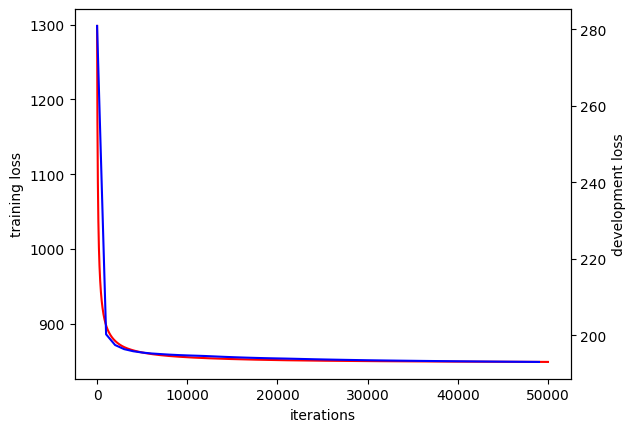

In [35]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(train_loss, c='r')
ax2.plot(range(1,50001, 1000), dev_loss, c='b')
ax1.set_xlabel('iterations')
ax1.set_ylabel('training loss')
ax2.set_ylabel('development loss')


#### Evaluating the trained model

In [36]:
loss, pred = Classifier_model_1.evaluate(X_test, Y_test)

In [37]:
accuracy = np.sum(np.where(np.argmax(Y_test, axis=0, keepdims=True) == np.argmax(pred, axis=0, keepdims=True)))/Y_test.shape[1]
accuracy

np.float64(9.978021978021978)

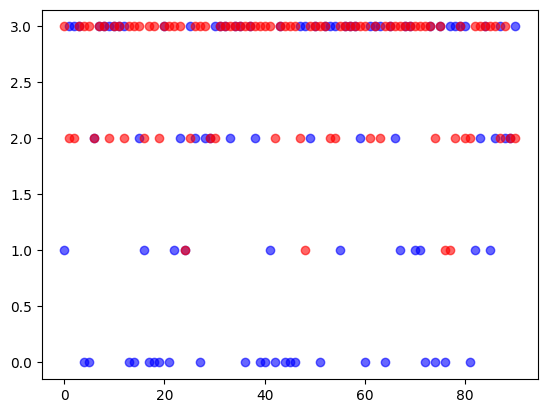

In [38]:
data = np.argmax(Y_test,axis=0, keepdims=True).flatten()
plt.scatter(range(len(data)), data, c="b", alpha=0.6)  # Scatter plot
plt.scatter(range(len(pred)), pred.flatten(), c='r', alpha=0.6)

#### Weights and grads of trained model

In [39]:
for i in Classifier_model_1.grads:
    print(i)
    print(Classifier_model_1.grads[i])

dW4
[[-0.01089992 -0.07095677 -0.03543481  0.00045448 -0.00355452]
 [ 0.00605916  0.14688631  0.08041189 -0.00120412  0.01228428]
 [ 0.02565556  0.05518692  0.08344789 -0.00073477  0.05165892]
 [-0.02081481 -0.13111647 -0.12842496  0.00148441 -0.06038868]]
db4
[[-0.07165176]
 [ 0.13181044]
 [ 0.13517682]
 [-0.1953355 ]]
dW3
[[ 7.82196847e-02  2.20938872e-03 -2.98270485e-04  1.26441457e-02
   9.51585549e-04]
 [ 2.35644981e-02  1.94650644e-04 -7.54347771e-04  6.50355718e-02
  -2.92290020e-03]
 [-3.66766835e-02 -8.17126762e-04  4.89341717e-04 -2.43603228e-02
  -1.45917879e-02]
 [ 4.08820669e-04  3.56760507e-06  5.31702717e-05  9.60899422e-07
   1.75843532e-04]
 [ 9.00960909e-02  2.23811399e-03 -2.96228241e-04  1.11172925e-02
   2.19354077e-02]]
db3
[[ 0.06098633]
 [ 0.04547723]
 [-0.07304293]
 [ 0.0038133 ]
 [ 0.07888272]]
dW2
[[ 0.01477026  0.05210453  0.01040785  0.02523474  0.0281904 ]
 [ 0.00563768  0.01191134 -0.00131291  0.00197773  0.00428136]
 [ 0.00018955  0.00409305  0.0002147  

In [40]:
for i in Classifier_model_1.parameters:
    print(i)
    print(Classifier_model_1.parameters[i])

W1
[[ 0.55485161 -0.08988859 -0.09523852 -0.13742889  0.30792493  0.19322035
   0.12084163  0.03292537 -0.35561308 -0.16954948  0.2115691   0.63455369
   0.34121101 -0.39632562  0.6473883  -0.42079647 -0.20173953  0.00874681
  -0.36790717  0.07428174]
 [-0.18109594  0.0075906  -0.2529615  -0.16334121  0.0750396   0.14016868
   0.48354406  0.284866    0.38788279 -0.38085505 -0.05414409 -0.23213774
   0.20234719  0.06605658  0.24391272  0.20187198 -0.13850803 -0.22926604
  -0.08761534 -0.4338011 ]
 [ 0.16820138 -0.30250303 -0.35562999 -0.05718751 -0.38273768 -0.02995517
  -0.06147884  0.27615925  0.10577001 -0.16022915  0.03709032  0.47396006
   0.51532802  0.28529208 -0.28099093  0.17219899 -0.21288424  0.31141504
  -0.44036367 -0.1734431 ]
 [ 0.55915446 -0.14008409  0.37973641 -0.29428326 -0.00701141  0.26001743
   0.65822834  0.01680935  0.41061829  0.26900303  0.07950291  0.08049982
   0.3998169   0.22949952  0.6226989  -0.0721496  -0.18859739  0.25272952
   0.2767024   0.00548221]
 

### Training another model without weighted classes

In [41]:
Classifier_model_2 = NN(input_size=X_train.shape[0], architecture=[5,5,5,4],activations=['Leaky_ReLU', 'Leaky_ReLU', 'Leaky_ReLU', 'Softmax'] ,loss="CCE")

In [42]:
train_loss, dev_loss = model_train(model=Classifier_model_2, learning_rate=0.1, num_epochs=50000)

Epoch 0: Train Loss = 137.17115553539747, Dev Loss = 29.10244075568196
Epoch 1000: Train Loss = 120.05210852861813, Dev Loss = 27.326513872716
Epoch 2000: Train Loss = 118.35359353455341, Dev Loss = 27.012329843990727
Epoch 3000: Train Loss = 117.46673392467675, Dev Loss = 26.81929136362691
Epoch 4000: Train Loss = 116.89881756757975, Dev Loss = 26.700744514654176
Epoch 5000: Train Loss = 116.47473589571031, Dev Loss = 26.6277673339931
Epoch 6000: Train Loss = 116.13074619123404, Dev Loss = 26.58180677734686
Epoch 7000: Train Loss = 115.85939778402495, Dev Loss = 26.546310464530116
Epoch 8000: Train Loss = 115.61616147994033, Dev Loss = 26.52095419617889
Epoch 9000: Train Loss = 115.3996915405485, Dev Loss = 26.500971401329654
Epoch 10000: Train Loss = 115.20414776883979, Dev Loss = 26.485683769735523
Epoch 11000: Train Loss = 115.0310379546236, Dev Loss = 26.473712079398304
Epoch 12000: Train Loss = 114.87403350396954, Dev Loss = 26.463801919200698
Epoch 13000: Train Loss = 114.729845

Text(0, 0.5, 'development loss')

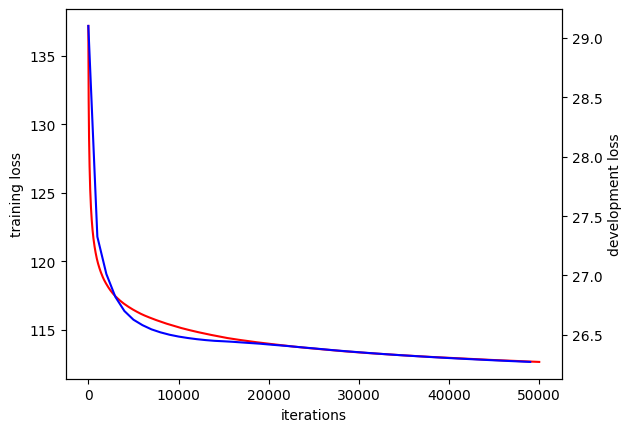

In [43]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(train_loss, c='r')
ax2.plot(range(1,50001, 1000), dev_loss, c='b')
ax1.set_xlabel('iterations')
ax1.set_ylabel('training loss')
ax2.set_ylabel('development loss')


#### Evaluating the trained model

In [44]:
loss, pred = Classifier_model_2.evaluate(X_test, Y_test)

In [45]:
accuracy = np.sum(np.where(np.argmax(Y_test, axis=0, keepdims=True) == np.argmax(pred, axis=0, keepdims=True)))/Y_test.shape[1]
accuracy

np.float64(9.978021978021978)

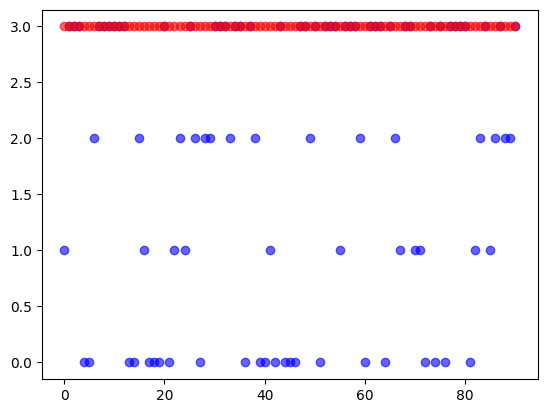

In [46]:
data = np.argmax(Y_test,axis=0, keepdims=True).flatten()
plt.scatter(range(len(data)), data, c="b", alpha=0.6)  # Scatter plot
plt.scatter(range(len(pred)), pred.flatten(), c='r', alpha=0.6)

#### Weights and grads of trained model (without weighted class implementation)

In [47]:
for i in Classifier_model_2.grads:
    print(i)
    print(Classifier_model_2.grads[i])

dW4
[[-1.36961581e-04  1.07426169e-02  8.39895638e-04  1.85709678e-02
   3.42703892e-03]
 [ 1.86643741e-05 -5.83752324e-03  2.54511988e-03 -6.58400042e-03
  -3.69134068e-04]
 [ 4.70122299e-05 -1.63402264e-03 -2.83250726e-03 -1.57648641e-03
  -1.37174351e-03]
 [ 7.12849774e-05 -3.27107099e-03 -5.52508254e-04 -1.04104810e-02
  -1.68616134e-03]]
db4
[[-0.03915865]
 [ 0.00220788]
 [ 0.02136379]
 [ 0.01558697]]
dW3
[[-1.20757964e-04  4.38180325e-05 -8.19771757e-05 -6.44633133e-05
   1.05038787e-05]
 [-1.56374257e-02 -2.44359832e-02 -1.91289624e-03  1.37347654e-03
  -1.89369893e-04]
 [-1.75941812e-03 -4.45631867e-04 -1.37675296e-03 -2.86339028e-03
  -6.56995929e-06]
 [-3.95732801e-04  9.69168143e-04 -3.64820015e-03 -4.50040368e-03
   2.00348801e-03]
 [ 1.95704405e-02 -1.71472224e-02  8.66016676e-03  7.96203518e-03
  -3.55755265e-04]]
db3
[[ 1.29009395e-04]
 [-4.85412844e-03]
 [ 9.66138005e-05]
 [ 1.60987822e-03]
 [-1.84995521e-03]]
dW2
[[ 4.75442857e-03  5.22383260e-05  7.44540804e-03  2.018

In [48]:
for i in Classifier_model_2.parameters:
    print(i)
    print(Classifier_model_2.parameters[i])

W1
[[ 0.05713596  0.30629394  0.27402821  0.19591274 -0.15538768  0.13250185
   0.22087508  0.111291   -0.05933894 -0.01496151 -0.17769951 -0.12581166
   0.20106553 -0.68147372  0.04626795 -0.59232953  0.11691557  0.24243015
   0.23536162 -0.33244062]
 [ 0.60797225  0.42050661 -0.04751923  0.15926885  0.10316787  0.45480663
   0.21760329  0.07658182 -0.53287625  0.05018555  0.13604162  0.31450732
   0.54615025 -0.07823455  0.13011002  0.69781377  0.52785043  0.02053663
   0.09240453 -0.3668415 ]
 [ 0.26940008  0.17825943  0.35704165 -0.04923839 -0.20412934  0.04290957
   0.51041374  0.08285515  0.3022306   0.70663271  0.12065782  0.1459898
   0.05140319  0.3585356   0.47462099 -0.14527921  0.27703565 -0.12145244
   0.25949616 -0.11178708]
 [ 0.30061461  0.44001467  0.0117633   0.11472413 -0.06285818  0.56340823
  -0.04841537  0.33537611 -0.28498434 -0.19615946  0.06392952  0.33431487
  -0.49058017 -0.30833894 -0.32449864  0.46382612  0.16864831 -0.4061441
  -0.41346281  0.46696019]
 [ 